In [1]:
import torch
from torchvision import transforms
from transformers import SamModel, SamProcessor
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid
import matplotlib.pyplot as plt

In [2]:
model = SamModel.from_pretrained("Zigeng/SlimSAM-uniform-50").to("cuda")
processor = SamProcessor.from_pretrained("Zigeng/SlimSAM-uniform-50")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/365 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/112M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

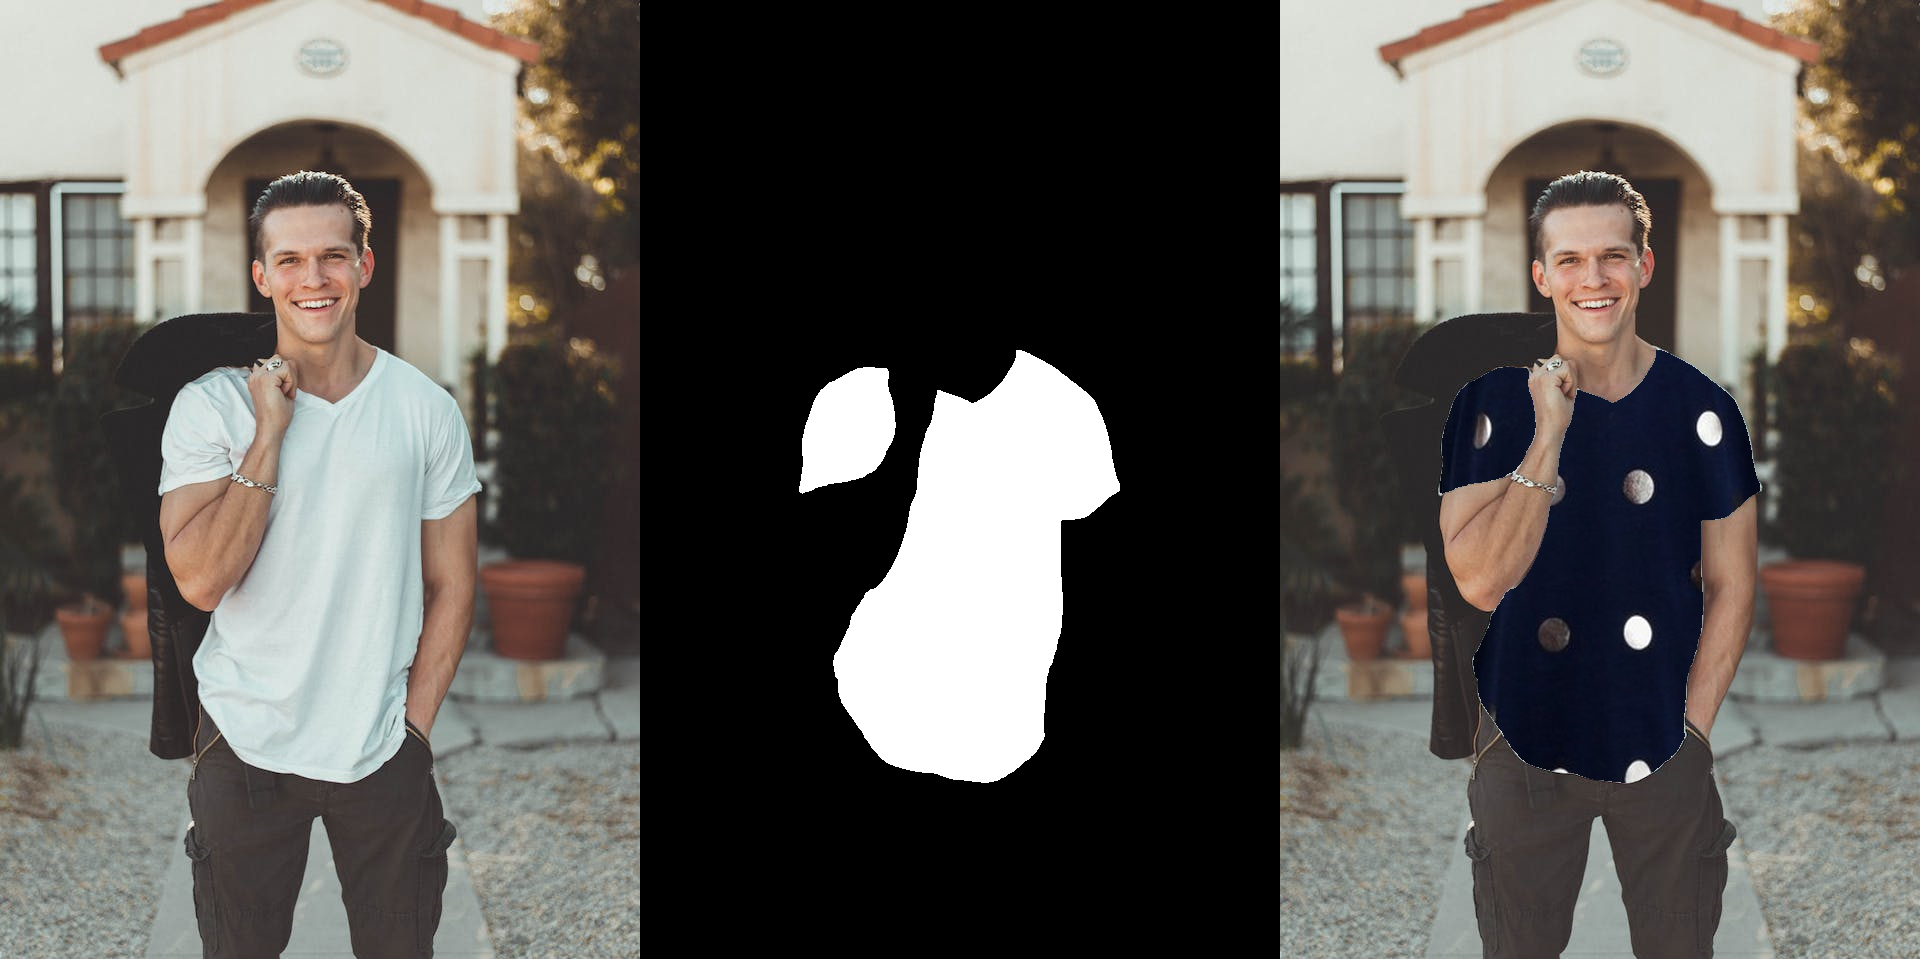

In [3]:
import torch
from torchvision import transforms
from transformers import SamModel, SamProcessor
from diffusers.utils import load_image, make_image_grid
import matplotlib.pyplot as plt
from PIL import Image

# Load original image
img = load_image("/content/drive/MyDrive/Virtual Try On/white_tshirt (1).jpg")

# Load new t-shirt image (ensure it has a transparent background)
new_tshirt = load_image("/content/drive/MyDrive/Virtual Try On/06802_00-removebg-preview.png")

# Load model and processor
model = SamModel.from_pretrained("Zigeng/SlimSAM-uniform-50").to("cuda")
processor = SamProcessor.from_pretrained("Zigeng/SlimSAM-uniform-50")

# Define input points for segmentation (adjust as needed)
input_points = [[[320, 600]]]
inputs = processor(img, input_points=input_points, return_tensors="pt").to("cuda")
outputs = model(**inputs)

# Process mask
masks = processor.image_processor.post_process_masks(outputs.pred_masks.cpu(),
                                                      inputs["original_sizes"].cpu(),
                                                      inputs["reshaped_input_sizes"].cpu())

# Convert mask to PIL image
mask_tensor = masks[0][0][2].to(dtype=torch.uint8)
mask = transforms.ToPILImage()(mask_tensor * 255)

# Resize new t-shirt to match the original image
new_tshirt = new_tshirt.resize(img.size, Image.LANCZOS)

# Paste new t-shirt onto the original image using the mask
img_with_new_tshirt = Image.composite(new_tshirt, img, mask)

# Display results
make_image_grid([img, mask, img_with_new_tshirt], cols=3, rows=1)